#  Interactive Text-to-Speech Program

This project is a Python-based Text-to-Speech (TTS) application using the **pyttsx3** library.  
It allows users to type any text, and the program will **speak it aloud** until they type an exit command (`exit`, `quit`, `stop`, or `bye`).  


In [1]:
! pip install pyttsx3 

In [2]:
import pyttsx3
import time

def create_engine():
    """Create and configure a new text-to-speech engine"""
    engine = pyttsx3.init()
    engine.setProperty('rate', 130)  # Set speaking rate
    engine.setProperty('volume', 1.0)  # Set volume level (max)
    return engine

def speak_text(text):
    """Use the TTS engine to speak the provided text"""
    try:
        engine = create_engine()
        engine.say(text)
        engine.runAndWait()
        engine.stop()
        return True
    except Exception as e:
        print(f"Error: {e}")
        return False

def main():
    print("=" * 50)
    print("Interactive Text-to-Speech Program")
    print("Type anything, and it will be spoken aloud.")
    print("To exit the program, type: 'exit', 'quit', 'stop', or 'bye'")
    print("=" * 50)
    
    # Initial test message
    print("\nInitializing voice test...")
    speak_text("Hello! I am ready to speak whatever you type.")
    
    while True:
        # Get user input
        text = input("\nEnter text to speak: ").strip()
        
        # Exit condition
        if text.lower() in ['exit', 'quit', 'stop', 'bye']:
            speak_text("Goodbye! See you next time.")
            print("Shutting down the program...")
            break
        
        # Handle empty input
        if not text:
            print("Please type something.")
            continue
        
        # Speak the input text
        print(f"Speaking: {text}")
        success = speak_text(text)
        
        if not success:
            print("An error occurred. Retrying...")
            time.sleep(1)
            speak_text(text)

if __name__ == "__main__":
    main()


Interactive Text-to-Speech Program
Type anything, and it will be spoken aloud.
To exit the program, type: 'exit', 'quit', 'stop', or 'bye'

Initializing voice test...



Enter text to speak:  jupyter notebook


Speaking: jupyter notebook



Enter text to speak:  br


Speaking: br



Enter text to speak:  a


Speaking: a



Enter text to speak:  y


Speaking: y



Enter text to speak:  go


Speaking: go



Enter text to speak:  stoping


Speaking: stoping



Enter text to speak:  by


Speaking: by



Enter text to speak:  bye


Shutting down the program...


---


#About the Project: ProVoice - Text to Speech Application

ProVoice is a beginner-friendly desktop application built with Python’s Tkinter library that converts typed text into spoken words using the pyttsx3 text-to-speech engine. It offers a clean, professional interface and responsive controls for an easy and smooth user experience.

Key Features:

Converts any typed text to speech with a single click

Runs speech synthesis in a background thread for a non-blocking UI

Supports stop functionality to immediately halt speaking

Clear button to quickly erase the input text

Real-time status updates with color-coded messages

Simple, lightweight, and uses only built-in and commonly used Python packages

This project is an excellent starting point for anyone looking to explore GUI programming and integrate text-to-speech functionality in Python.

In [1]:
import tkinter as tk
import threading
import pyttsx3

speaking = False
engine = None   # engine will be created fresh each time

def start_speaking():
    """Get text and start TTS in a background thread."""
    global speaking
    text = text_box.get("1.0", "end").strip()
    if not text:
        set_status("⚠️ Please type some text", "orange")
        return
    if speaking:
        return
    speaking = True
    update_buttons()
    set_status("🔊 Speaking...", "blue")
    threading.Thread(target=run_tts, args=(text,), daemon=True).start()

def run_tts(text):
    """Speak the text with a fresh engine."""
    global engine
    try:
        engine = pyttsx3.init()        # new engine each time
        engine.setProperty("rate", 140)
        engine.setProperty("volume", 1.0)
        engine.say(text)
        engine.runAndWait()
        root.after(0, lambda: set_status("✅ Done", "green"))
    except Exception as e:
        root.after(0, lambda: set_status(f"❌ {e}", "red"))
    finally:
        root.after(0, stop_finish)

def stop_now():
    """Stop speaking immediately (by reinitializing engine)."""
    global engine
    try:
        if engine is not None:
            engine.stop()
            engine = None              # drop old engine
    except:
        pass
    set_status("⏹️ Stopped", "orange")
    stop_finish()

def stop_finish():
    """Reset state and buttons after speak/stop finishes."""
    global speaking
    speaking = False
    update_buttons()

def clear_text():
    """Stop and clear the text box."""
    stop_now()
    text_box.delete("1.0", "end")
    set_status("🧹 Cleared. Ready.", "gray")

def set_status(message, color):
    """Change the status label text and color."""
    status.config(text=message, fg=color)

def update_buttons():
    """Enable/disable buttons based on speaking state."""
    if speaking:
        speak_btn.config(state="disabled")
        stop_btn.config(state="normal")
    else:
        speak_btn.config(state="normal")
        stop_btn.config(state="disabled")

# -------------------- GUI --------------------

root = tk.Tk()
root.title("ProVoice - Text to Speech")
root.geometry("600x420")
root.configure(bg="#f4f4f4")

tk.Label(root, text="ProVoice - Text to Speech", font=("Segoe UI", 18, "bold"), bg="#f4f4f4").pack(pady=10)
tk.Label(root, text="Type your text and press Speak", font=("Segoe UI", 11), bg="#f4f4f4").pack()

text_box = tk.Text(root, height=10, wrap="word", font=("Segoe UI", 12), bd=2, relief="groove")
text_box.pack(padx=15, pady=10, fill=tk.BOTH, expand=True)

btn_row = tk.Frame(root, bg="#f4f4f4")
btn_row.pack(pady=6)

speak_btn = tk.Button(btn_row, text="🔊 Speak", width=12, font=("Segoe UI", 10), command=start_speaking)
speak_btn.grid(row=0, column=0, padx=6)

stop_btn = tk.Button(btn_row, text="⏹️ Stop", width=12, font=("Segoe UI", 10), command=stop_now, state="disabled")
stop_btn.grid(row=0, column=1, padx=6)

clear_btn = tk.Button(btn_row, text="🧹 Clear", width=12, font=("Segoe UI", 10), command=clear_text)
clear_btn.grid(row=0, column=2, padx=6)

exit_btn = tk.Button(btn_row, text="❌ Exit", width=12, font=("Segoe UI", 10), command=lambda: (stop_now(), root.destroy()))
exit_btn.grid(row=0, column=3, padx=6)

status = tk.Label(root, text="📝 Ready", font=("Segoe UI", 10), bg="#f4f4f4")
status.pack(pady=10)

root.protocol("WM_DELETE_WINDOW", lambda: (stop_now(), root.destroy()))
root.mainloop()


# OUT

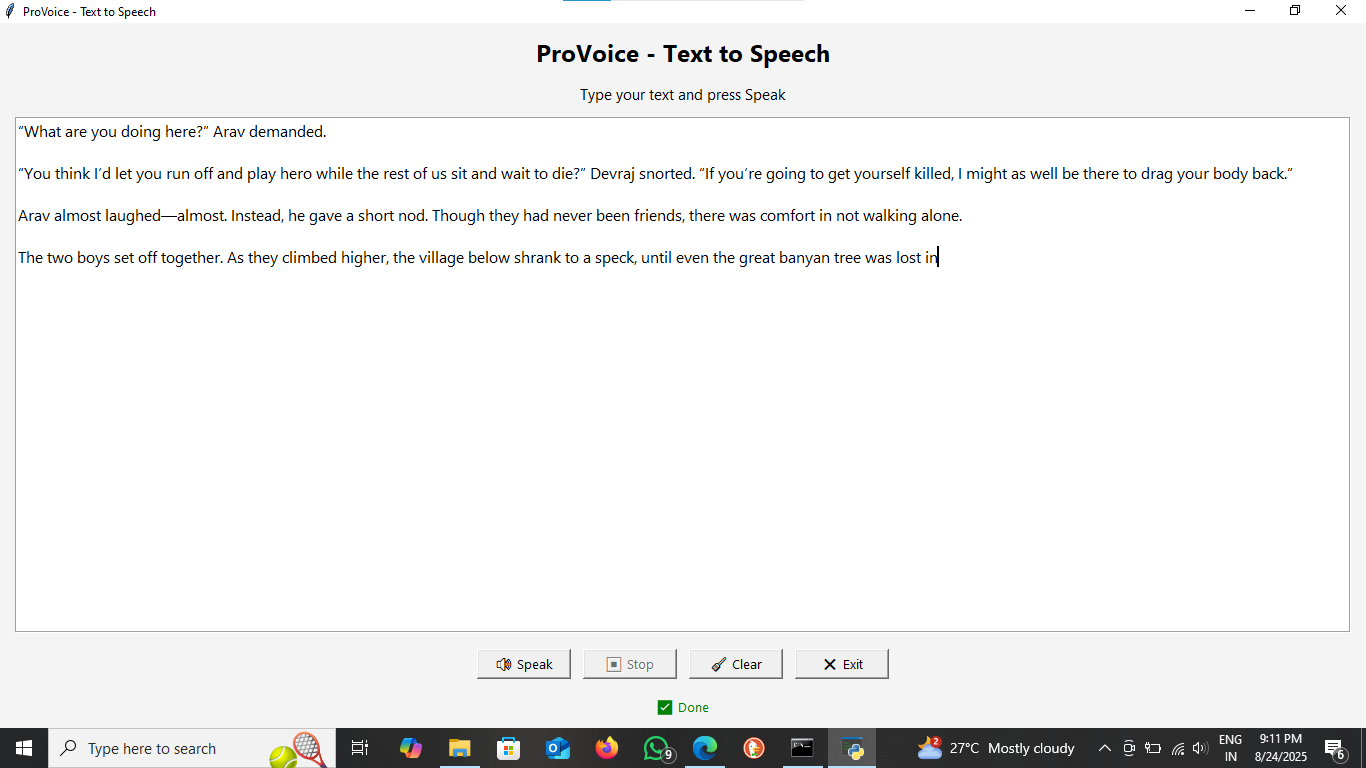